# Support Vector Machine Classifier

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

## Data preparation

In [3]:
from sklearn.svm import SVC

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'] = list(map(lambda x: 0 if x=='setosa' else 1, df['species']))

In [6]:
X = df.drop(columns=['species'])
y = df['species']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Model training and evaluation

In [8]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [9]:
y_pred = svc.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        30

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Classification and regression trees

## Classification Trees

### Data preparation

In [11]:
from sklearn.svm import SVC

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df['species'] = list(map(lambda x: 0 if x=='setosa' else 1, df['species']))

In [14]:
X = df.drop(columns=['species'])
y = df['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Model training and evaluation

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc_gini = DecisionTreeClassifier()
dtc_entropy = DecisionTreeClassifier(criterion='entropy')

dtc_gini.fit(X_train, y_train)
dtc_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred_gini = dtc_gini.predict(X_test)
y_pred_entropy = dtc_entropy.predict(X_test)

In [19]:
print("Decision Tree Classifier with gini criterion")
print(classification_report(y_test, y_pred_gini))

Decision Tree Classifier with gini criterion
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        16

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



[Text(167.4, 163.07999999999998, 'X[2] <= 2.45\ngini = 0.448\nsamples = 127\nvalue = [43, 84]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 84\nvalue = [0, 84]')]

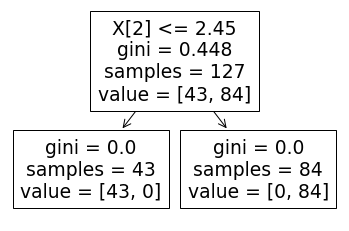

In [24]:
tree.plot_tree(dtc_gini)

In [20]:
print("Decision Tree Classifier with entropy criterion")
print(classification_report(y_test, y_pred_entropy))

Decision Tree Classifier with entropy criterion
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        16

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



[Text(167.4, 163.07999999999998, 'X[2] <= 2.45\nentropy = 0.923\nsamples = 127\nvalue = [43, 84]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 84\nvalue = [0, 84]')]

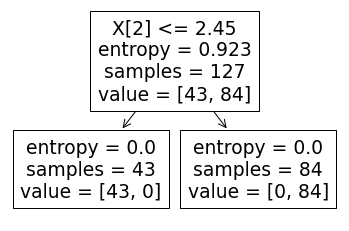

In [23]:
tree.plot_tree(dtc_entropy)

## Regression Trees

### Data preparation

In [68]:
df = pd.read_csv('machine.csv')
df.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [76]:
X = df.drop(columns=['199', 'adviser', '32/60'])
y = df['199']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Model training and evaluation

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
y_pred = dtr.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

9053.625

## Random Forest Classifier

### Data preparation

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
df['species'] = list(map(lambda x: 0 if x=='setosa' else 1, df['species']))

In [89]:
X = df.drop(columns=['species'])
y = df['species']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Model training and evaluation

In [91]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred = rfc.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        20

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



## Random Forest Regressor

### Data preparation

In [94]:
df = pd.read_csv('machine.csv')
df.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [95]:
X = df.drop(columns=['199', 'adviser', '32/60'])
y = df['199']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Model training and evaluation

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
y_pred = rfr.predict(X_test)

In [100]:
mean_squared_error(y_test, y_pred)

1511.844415625

The MSE is smaller compared to `DecisionTreeRegressor`